HR Analytics Project- Understanding the Attrition in HR

Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [2]:
df=pd.read_csv('IBM_HR_Attrition_Rate_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


We observe that in this data set numerical as well as categorical data is present

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory data analysis

In [4]:
#checking the null value of  column of dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We observe that there is no missing value 

In [5]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

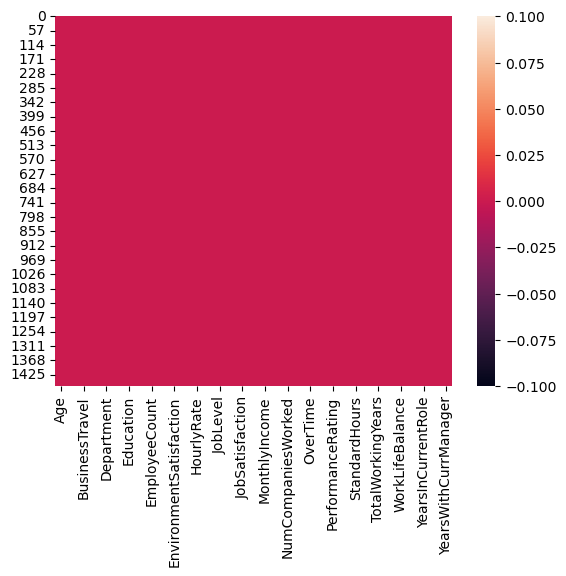

In [6]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that there is no null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

we observe that there is 1470 non null value in each feature

In [8]:
#checking the shape of dataset
df.shape

(1470, 35)

we observe that there is 1470 row and 35 column are present

In [9]:
#checking the column of dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# to convert index from row to column
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
#checking the types of column of dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

we observe that there is two datatype are present int and object

In [12]:
#checking the unique values of column of dataset
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


We observe that our target Attrition have two unique value 

In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [14]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We observe that emplyee who attr is 237 and who were not attr are 1233

In [15]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


There are 26 Numerical column are present and 9 Categorical columns also present

# Description of data set

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect

we can obserbe these points:
    
1.The counts of all columns are same it means there is no missing value in any column

2.The mean value is equal to median(50%) in approx all features it means there is no skewness

3.There no any columns in which mean value is less than median(50%) hence there no right skewed

4.There is major difference beteen 75% and max in DailyRate,DistanceFromHome and HourlyRate it means the outliers are 
present in these columns

5.In this discription min,std and 25% ditail also found

# Data visualization

No     1233
Yes     237
Name: Attrition, dtype: int64


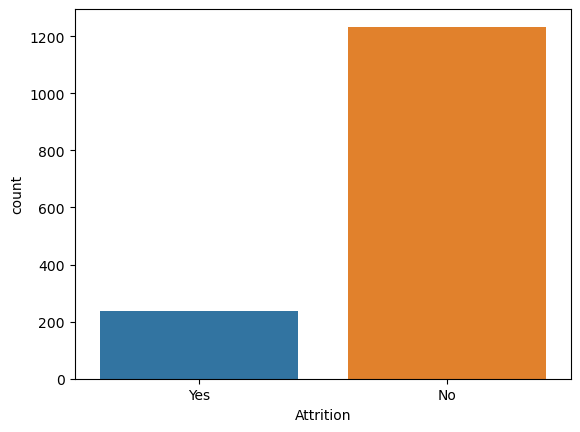

In [17]:
#visualizing the no of Attrition
ax=sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

We observe that only 237 appox employee attrition but most of employee nearly 1233 not attr from company

[Text(0.5, 1.0, 'DistanceFromHome effect on attrition')]

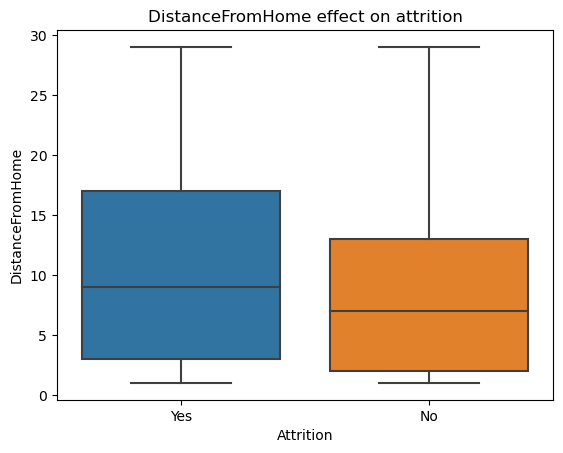

In [18]:
bp = sns.boxplot(x='Attrition',y='DistanceFromHome', data=df)
bp.set(title="DistanceFromHome effect on attrition")

we observe that when distance from home will increase the employee  attrition will increase

[Text(0.5, 1.0, 'DailyRate effect on attrition')]

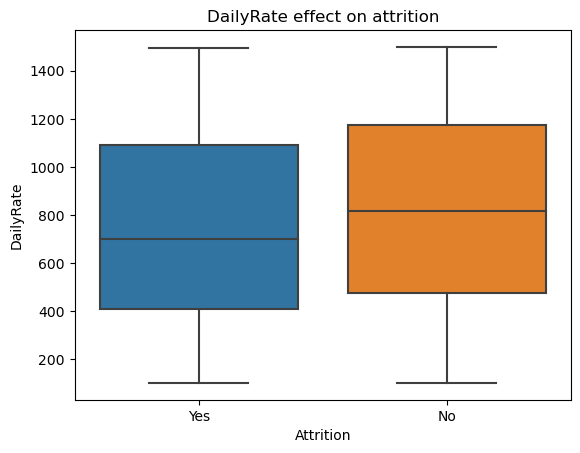

In [19]:
bp = sns.boxplot(x='Attrition',y='DailyRate', data=df)
bp.set(title="DailyRate effect on attrition")

we observe that when daily rate increase the employee attrition will reduce

[Text(0.5, 1.0, 'Age effect on attrition')]

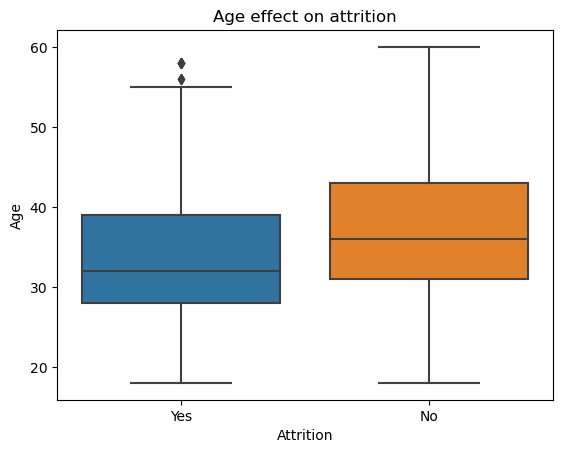

In [20]:
bp = sns.boxplot(x='Attrition',y='Age', data=df)
bp.set(title="Age effect on attrition")

we observe that when age of employee will increase the employee attrition will reduce

[Text(0.5, 1.0, 'Education effect on attrition')]

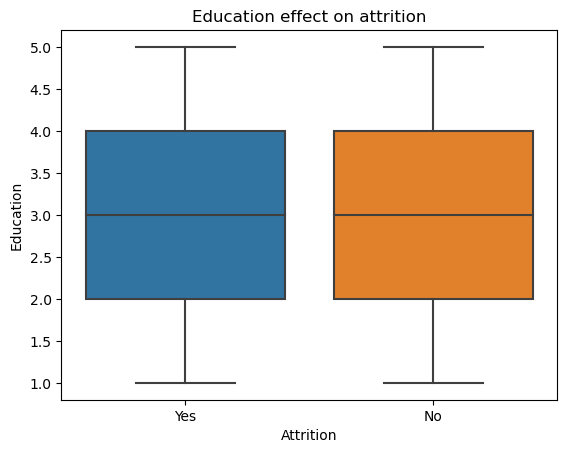

In [21]:
bp = sns.boxplot(x='Attrition',y='Education', data=df)
bp.set(title="Education effect on attrition")

we observe that effect of education approx same on attrition

[Text(0.5, 1.0, 'Employee Count effect on attrition')]

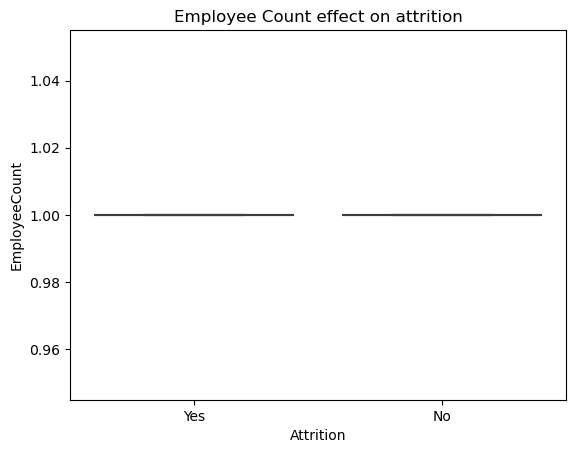

In [22]:
bp = sns.boxplot(x='Attrition',y='EmployeeCount', data=df)
bp.set(title="Employee Count effect on attrition")

we observe there no effect of employee count

[Text(0.5, 1.0, 'Employee Number effect on attrition')]

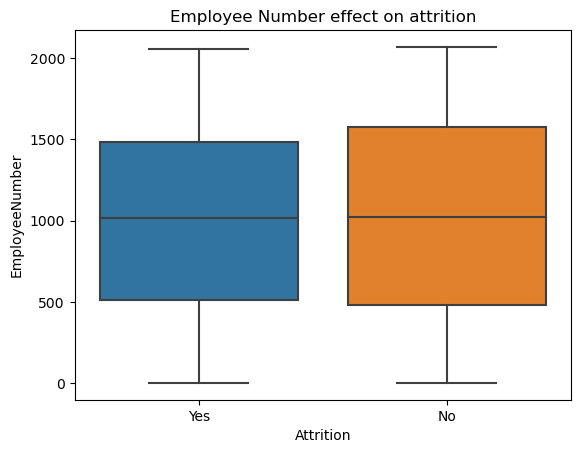

In [23]:
bp = sns.boxplot(x='Attrition',y='EmployeeNumber', data=df)
bp.set(title="Employee Number effect on attrition")

we observe that when Employee Number will increase the employee attrition will reduce

[Text(0.5, 1.0, 'EnvironmentSatisfaction effect on attrition')]

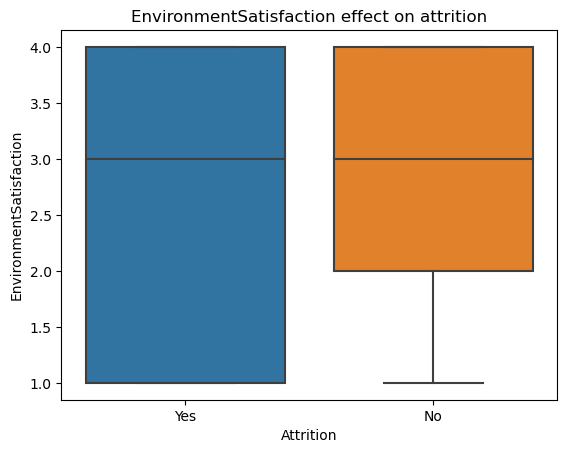

In [25]:
bp = sns.boxplot(x='Attrition',y='EnvironmentSatisfaction', data=df)
bp.set(title="EnvironmentSatisfaction effect on attrition")

we observe that when Environment Satisfaction  will increase the employee attrition will reduce

[Text(0.5, 1.0, 'HourlyRate effect on attrition')]

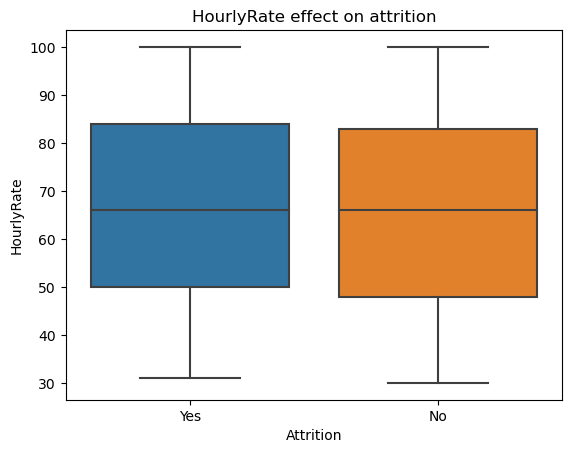

In [26]:
bp = sns.boxplot(x='Attrition',y='HourlyRate', data=df)
bp.set(title="HourlyRate effect on attrition")

we observe there no effect of HourlyRate

[Text(0.5, 1.0, 'JobInvolvement effect on attrition')]

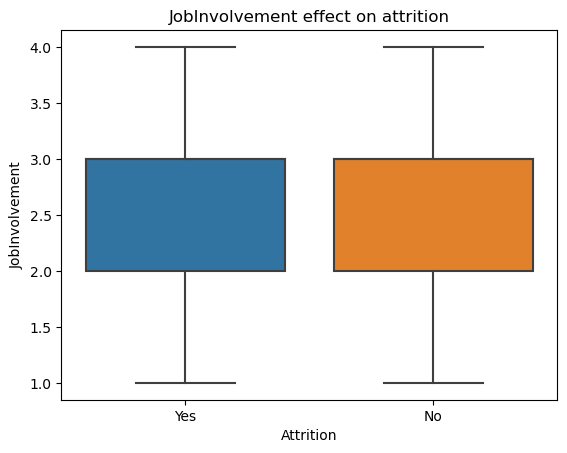

In [27]:
bp = sns.boxplot(x='Attrition',y='JobInvolvement', data=df)
bp.set(title="JobInvolvement effect on attrition")

we observe there no effect of JobInvolvement

[Text(0.5, 1.0, 'JobLevel effect on attrition')]

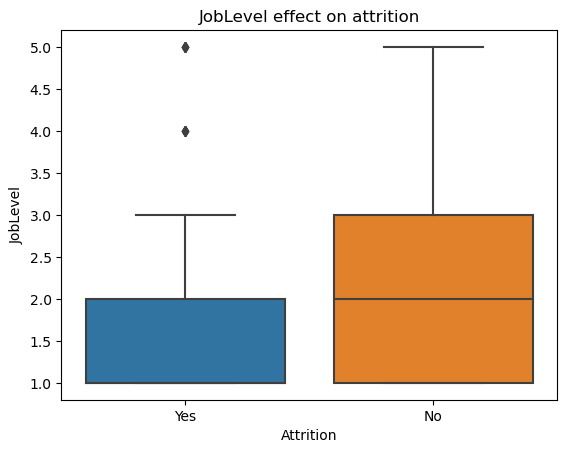

In [28]:
bp = sns.boxplot(x='Attrition',y='JobLevel', data=df)
bp.set(title="JobLevel effect on attrition")

we observe that when JobLevel will increase the employee attrition will reduce

[Text(0.5, 1.0, 'RelationshipSatisfaction effect on attrition')]

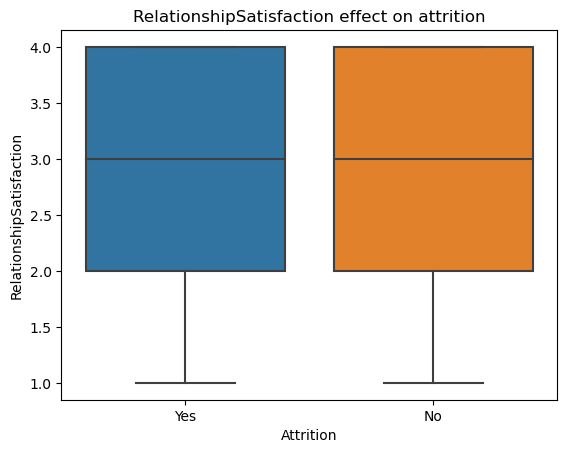

In [29]:
bp = sns.boxplot(x='Attrition',y='RelationshipSatisfaction', data=df)
bp.set(title="RelationshipSatisfaction effect on attrition")

we observe there no effect of RelationshipSatisfaction

[Text(0.5, 1.0, 'StandardHours effect on attrition')]

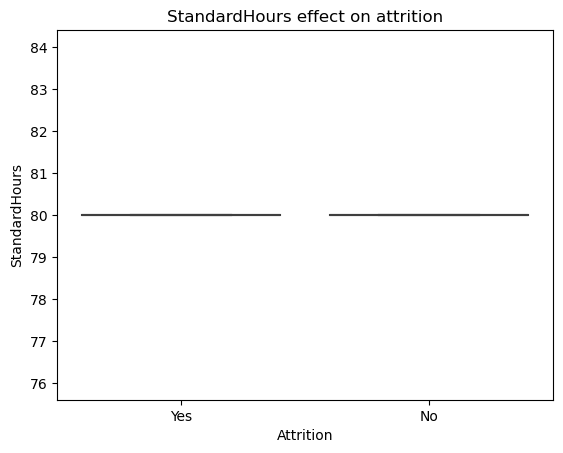

In [30]:
bp = sns.boxplot(x='Attrition',y='StandardHours', data=df)
bp.set(title="StandardHours effect on attrition")

[Text(0.5, 1.0, 'StockOptionLevel effect on attrition')]

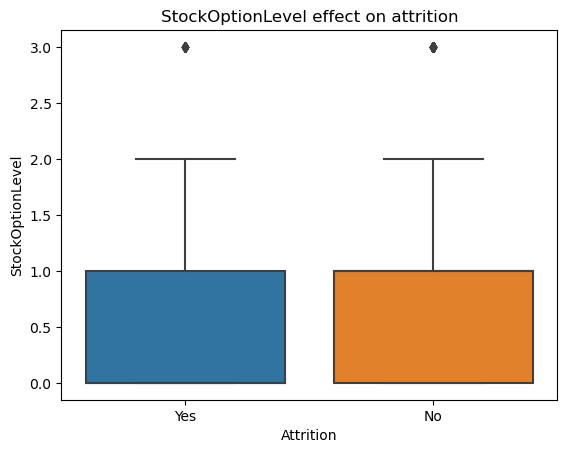

In [31]:
bp = sns.boxplot(x='Attrition',y='StockOptionLevel', data=df)
bp.set(title="StockOptionLevel effect on attrition")

[Text(0.5, 1.0, 'TotalWorkingYears effect on attrition')]

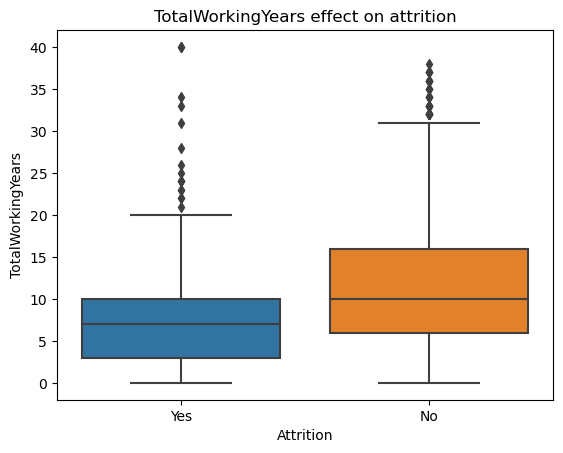

In [32]:
bp = sns.boxplot(x='Attrition',y='TotalWorkingYears', data=df)
bp.set(title="TotalWorkingYears effect on attrition")

[Text(0.5, 1.0, 'TrainingTimesLastYear effect on attrition')]

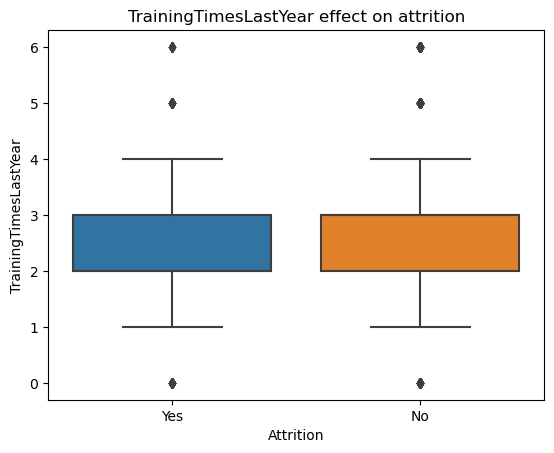

In [33]:
bp = sns.boxplot(x='Attrition',y='TrainingTimesLastYear', data=df)
bp.set(title="TrainingTimesLastYear effect on attrition")

[Text(0.5, 1.0, 'WorkLifeBalance effect on attrition')]

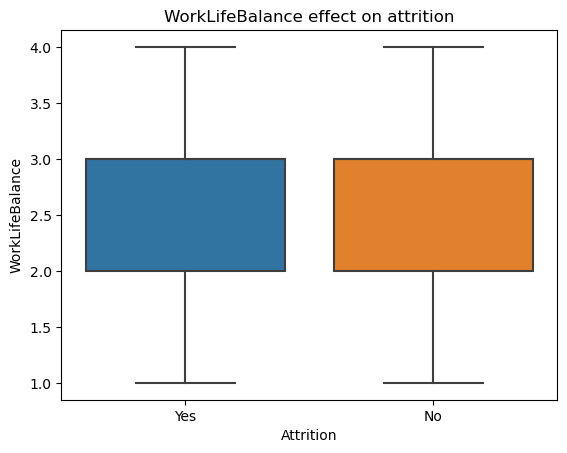

In [34]:
bp = sns.boxplot(x='Attrition',y='WorkLifeBalance', data=df)
bp.set(title="WorkLifeBalance effect on attrition")

[Text(0.5, 1.0, 'YearsAtCompanyr effect on attrition')]

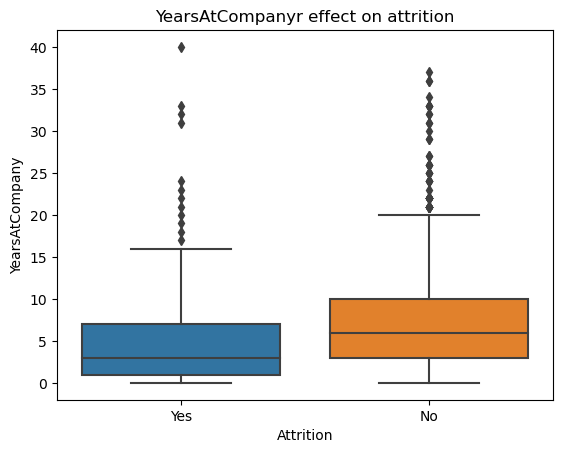

In [35]:
bp = sns.boxplot(x='Attrition',y='YearsAtCompany', data=df)
bp.set(title="YearsAtCompanyr effect on attrition")

[Text(0.5, 1.0, 'YearsInCurrentRole effect on attrition')]

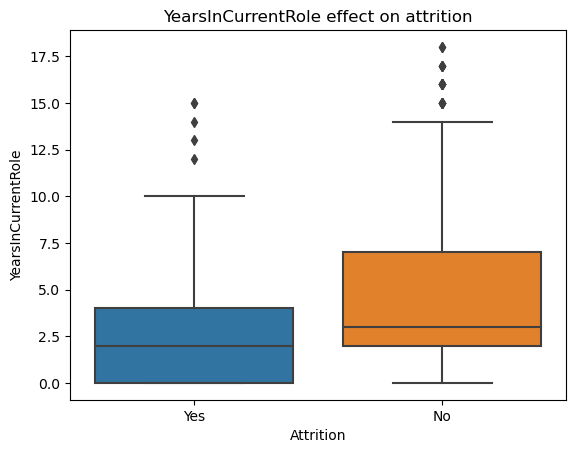

In [36]:
bp = sns.boxplot(x='Attrition',y='YearsInCurrentRole', data=df)
bp.set(title="YearsInCurrentRole effect on attrition")

[Text(0.5, 1.0, 'YearsSinceLastPromotion effect on attrition')]

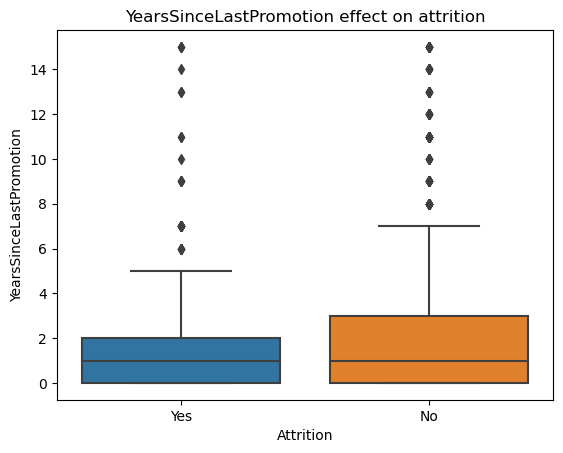

In [37]:
bp = sns.boxplot(x='Attrition',y='YearsSinceLastPromotion', data=df)
bp.set(title="YearsSinceLastPromotion effect on attrition")

[Text(0.5, 1.0, 'YearsWithCurrManager effect on attrition')]

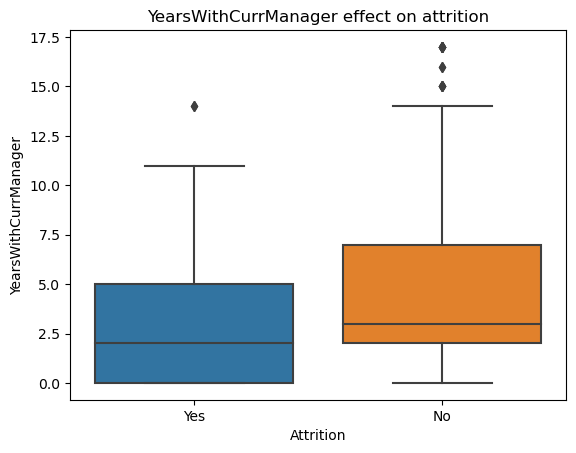

In [38]:
bp = sns.boxplot(x='Attrition',y='YearsWithCurrManager', data=df)
bp.set(title="YearsWithCurrManager effect on attrition")

# Encoding columns value

In [39]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [40]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['BusinessTravel']

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32

In [41]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int32

In [42]:
df['JobRole']=le.fit_transform(df['JobRole'])
df['JobRole']

0       7
1       6
2       2
3       6
4       2
       ..
1465    2
1466    0
1467    4
1468    7
1469    2
Name: JobRole, Length: 1470, dtype: int32

In [43]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['MaritalStatus']

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int32

In [44]:
df['Over18']=le.fit_transform(df['Over18'])
df['Over18']

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Over18, Length: 1470, dtype: int32

In [45]:
df['OverTime']=le.fit_transform(df['OverTime'])
df['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int32

# Cleaning of dataset

In [46]:
df.drop(['Department'], axis=1, inplace=True)

In [47]:
df.drop(['EducationField'], axis=1, inplace=True)

In [48]:
df.drop(['Education'], axis=1, inplace=True)

In [49]:
df.drop(['EmployeeCount'], axis=1, inplace=True)

In [50]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [51]:
df.drop(['MonthlyRate'], axis=1, inplace=True)

In [52]:
df.drop(['TotalWorkingYears'], axis=1, inplace=True)

In [53]:
df.drop(['HourlyRate'], axis=1, inplace=True)

In [54]:
df.drop(['JobInvolvement'], axis=1, inplace=True)

In [55]:
df.drop(['PerformanceRating'], axis=1, inplace=True)

In [56]:
df.drop(['TrainingTimesLastYear'], axis=1, inplace=True)

In [57]:
df.drop(['StockOptionLevel'], axis=1, inplace=True)

In [58]:
df.drop(['DailyRate'], axis=1, inplace=True)

In [59]:
df.drop(['BusinessTravel'], axis=1, inplace=True)

In [60]:
df.drop(['JobRole'], axis=1, inplace=True)

In [61]:
df.drop(['Over18'], axis=1, inplace=True)

In [62]:
df.drop(['OverTime'], axis=1, inplace=True)

In [63]:
df.drop(['StandardHours'], axis=1, inplace=True)

In [64]:
df.drop(['YearsInCurrentRole'], axis=1, inplace=True)

In [65]:
df.drop(['YearsWithCurrManager'], axis=1, inplace=True)

In [66]:
df

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,1,2,0,2,4,2,5993,8,11,1,1,6,0
1,49,0,8,3,1,2,2,1,5130,1,23,4,3,10,1
2,37,1,2,4,1,1,3,2,2090,6,15,2,3,0,0
3,33,0,3,4,0,1,3,1,2909,1,11,3,3,8,3
4,27,0,2,1,1,1,2,1,3468,9,12,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,3,1,2,4,1,2571,4,17,3,3,5,0
1466,39,0,6,4,1,3,1,1,9991,4,15,1,3,7,1
1467,27,0,4,2,1,2,2,1,6142,1,20,2,3,6,0
1468,49,0,2,4,1,2,2,1,5390,2,14,4,2,9,0


after droping unrelavent column we have 140 row and 15 column are present

In [67]:
df.groupby('Attrition').mean()

,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Attrition,,,,,,,,,,,,,,
0,37.561233,8.915653,2.771290,0.593674,2.145985,2.778589,1.045418,6832.739659,2.645580,15.231144,2.733982,2.781022,7.369019,2.234388
1,33.607595,10.632911,2.464135,0.632911,1.637131,2.468354,1.367089,4787.092827,2.940928,15.097046,2.599156,2.658228,5.130802,1.945148


In [68]:
df.groupby('Gender').mean()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Gender,,,,,,,,,,,,,,
0,37.329932,0.147959,9.210884,2.721088,2.117347,2.683673,1.139456,6686.566327,2.812925,15.197279,2.681973,2.763605,7.231293,2.294218
1,36.653061,0.170068,9.180272,2.722222,2.028345,2.758503,1.069161,6380.507937,2.613379,15.217687,2.732426,2.759637,6.859410,2.116780


# Correlation Matrix and Heatmap

In [69]:
df.corr()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,-0.159205,-0.001686,0.010146,-0.036311,0.509604,-0.004892,-0.095029,0.497855,0.299635,0.003634,0.053535,-0.021490,0.311309,0.216513
Attrition,-0.159205,1.000000,0.077924,-0.103369,0.029453,-0.169105,-0.103481,0.162070,-0.159840,0.043494,-0.013478,-0.045872,-0.063939,-0.134392,-0.033019
DistanceFromHome,-0.001686,0.077924,1.000000,-0.016075,-0.001851,0.005303,-0.003669,-0.014437,-0.017014,-0.029251,0.040235,0.006557,-0.026556,0.009508,0.010029
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,1.000000,0.000508,0.001212,-0.006784,-0.003593,-0.006259,0.012594,-0.031701,0.007665,0.027627,0.001458,0.016194
Gender,-0.036311,0.029453,-0.001851,0.000508,1.000000,-0.039403,0.033252,-0.047183,-0.031858,-0.039147,0.002733,0.022868,-0.002753,-0.029747,-0.026985
JobLevel,0.509604,-0.169105,0.005303,0.001212,-0.039403,1.000000,-0.001944,-0.076769,0.950300,0.142501,-0.034730,0.021642,0.037818,0.534739,0.353885
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.006784,0.033252,-0.001944,1.000000,0.024360,-0.007157,-0.055699,0.020002,-0.012454,-0.019459,-0.003803,-0.018214
MaritalStatus,-0.095029,0.162070,-0.014437,-0.003593,-0.047183,-0.076769,0.024360,1.000000,-0.075450,-0.035505,0.012492,0.022549,0.014708,-0.059986,-0.030915
MonthlyIncome,0.497855,-0.159840,-0.017014,-0.006259,-0.031858,0.950300,-0.007157,-0.075450,1.000000,0.149515,-0.027269,0.025873,0.030683,0.514285,0.344978
NumCompaniesWorked,0.299635,0.043494,-0.029251,0.012594,-0.039147,0.142501,-0.055699,-0.035505,0.149515,1.000000,-0.010238,0.052733,-0.008366,-0.118421,-0.036814


Text(0.5, 1.0, 'Correlations Among Features')

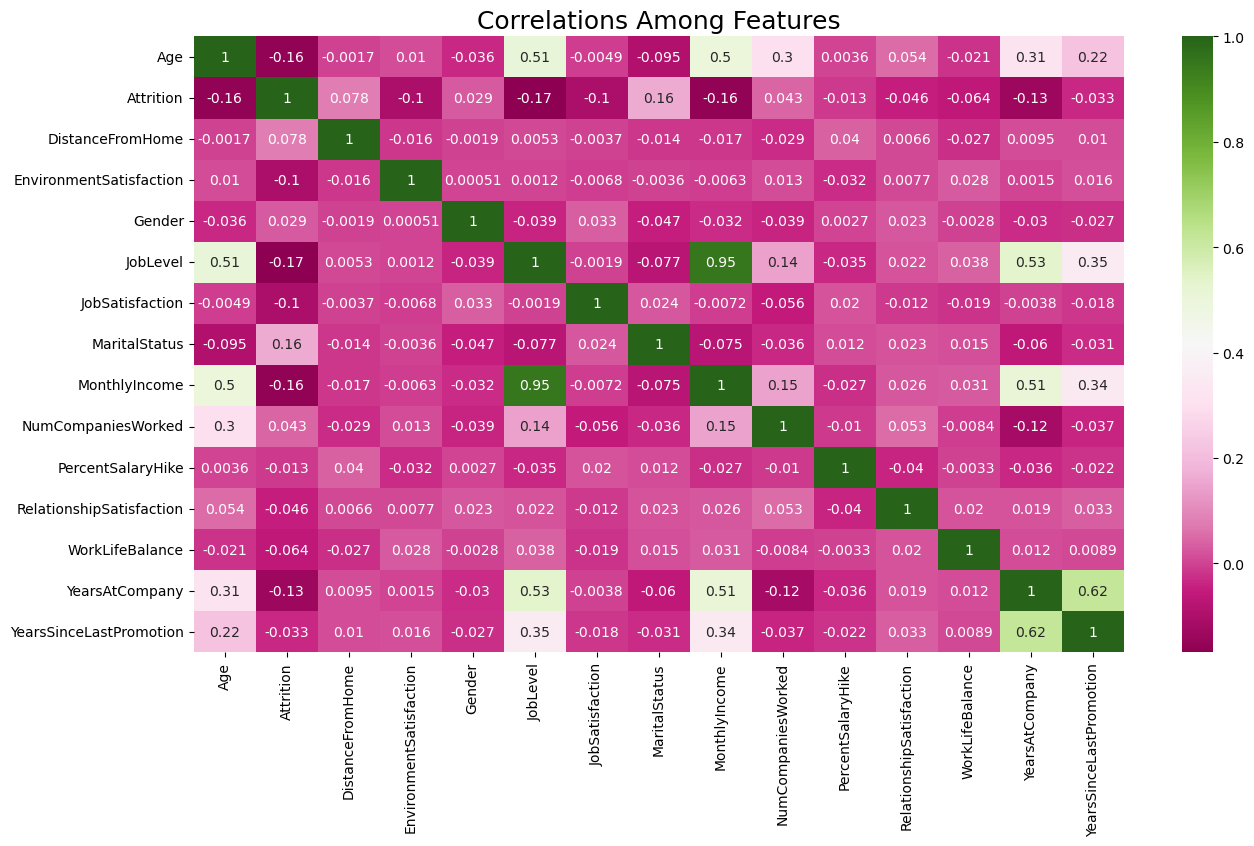

In [70]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

attrition and distance from home 0.78.
There is a positive correlation between attrition and distance from home. This can be explained by saying that,
the employee whos home distance is more they will more attr from company.

Negative Correlation Features:

attrition and year at company -0.13
This relationship can be explained by saying that attrition and year at company less attr from company


In [71]:
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,1,2,0,2,4,2,5993,8,11,1,1,6,0
1,49,0,8,3,1,2,2,1,5130,1,23,4,3,10,1
2,37,1,2,4,1,1,3,2,2090,6,15,2,3,0,0
3,33,0,3,4,0,1,3,1,2909,1,11,3,3,8,3
4,27,0,2,1,1,1,2,1,3468,9,12,4,3,2,2


In [72]:
df

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,1,2,0,2,4,2,5993,8,11,1,1,6,0
1,49,0,8,3,1,2,2,1,5130,1,23,4,3,10,1
2,37,1,2,4,1,1,3,2,2090,6,15,2,3,0,0
3,33,0,3,4,0,1,3,1,2909,1,11,3,3,8,3
4,27,0,2,1,1,1,2,1,3468,9,12,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,3,1,2,4,1,2571,4,17,3,3,5,0
1466,39,0,6,4,1,3,1,1,9991,4,15,1,3,7,1
1467,27,0,4,2,1,2,2,1,6142,1,20,2,3,6,0
1468,49,0,2,4,1,2,2,1,5390,2,14,4,2,9,0


In [73]:
correlations = df.corr()['Attrition'].sort_values(ascending=False)
print(correlations)

Attrition                   1.000000
MaritalStatus               0.162070
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
Gender                      0.029453
PercentSalaryHike          -0.013478
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
YearsAtCompany             -0.134392
Age                        -0.159205
MonthlyIncome              -0.159840
JobLevel                   -0.169105
Name: Attrition, dtype: float64


no data is skewed

<Axes: >

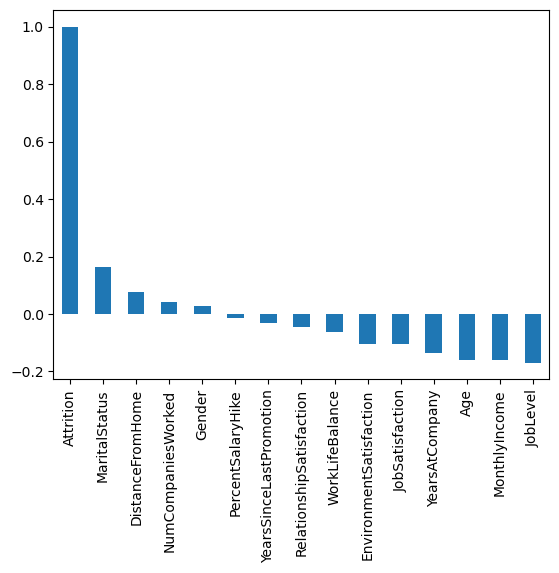

In [74]:
correlations.plot(kind='bar')

we observe that matital status is positively and job level is highly negatively correleted

# Separating feature and target

In [75]:
x=df.drop("Attrition", axis= 1)
y=df["Attrition"]

# Feature Scaling using Standard Scalarization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,-1.010909,-0.660531,-1.224745,-0.057788,1.153254,1.236820,-0.108350,2.125136,-1.150554,-1.584178,-2.493820,-0.164613,-0.679146
1,1.322365,-0.147150,0.254625,0.816497,-0.057788,-0.660853,-0.133282,-0.291719,-0.678049,2.129306,1.191438,0.338096,0.488508,-0.368715
2,0.008343,-0.887515,1.169781,0.816497,-0.961486,0.246200,1.236820,-0.937654,1.324226,-0.057267,-0.658973,0.338096,-1.144294,-0.679146
3,-0.429664,-0.764121,1.169781,-1.224745,-0.961486,0.246200,-0.133282,-0.763634,-0.678049,-1.150554,0.266233,0.338096,0.161947,0.252146
4,-1.086676,-0.887515,-1.575686,0.816497,-0.961486,-0.660853,-0.133282,-0.644858,2.525591,-0.877232,1.191438,0.338096,-0.817734,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.703764,0.254625,0.816497,-0.057788,1.153254,-0.133282,-0.835451,0.523316,0.489376,0.266233,0.338096,-0.327893,-0.679146
1466,0.227347,-0.393938,1.169781,0.816497,0.845911,-1.567907,-0.133282,0.741140,0.523316,-0.057267,-1.584178,0.338096,-0.001333,-0.368715
1467,-1.086676,-0.640727,-0.660531,0.816497,-0.057788,-0.660853,-0.133282,-0.076690,-0.678049,1.309341,-0.658973,0.338096,-0.164613,-0.679146
1468,1.322365,-0.887515,1.169781,0.816497,-0.057788,-0.660853,-0.133282,-0.236474,-0.277594,-0.330589,1.191438,-1.077862,0.325228,-0.679146


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [77]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.490323,Age
1,1.009132,DistanceFromHome
2,1.003294,EnvironmentSatisfaction
3,1.008243,Gender
4,10.891834,JobLevel
5,1.006693,JobSatisfaction
6,1.015808,MaritalStatus
7,10.442059,MonthlyIncome
8,1.188283,NumCompaniesWorked
9,1.007875,PercentSalaryHike


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [78]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

oversampling

In [79]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [80]:
y1.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

Best accuracy is = 0.9202702702702703 at random_state  200


we observe the best accuracy is 82.4% at random_state 200

# creat train test split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [84]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [85]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.9202702702702703
[[329  12]
 [ 47 352]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       341
           1       0.97      0.88      0.92       399

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



we observe that RandomForestClassifier accuracy 82%

# LogisticRegression

In [86]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.9283783783783783
[[334   7]
 [ 46 353]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       341
           1       0.98      0.88      0.93       399

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



we observe that LogisticRegression acuracy 81%

# support vector classifier

In [87]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.85
[[286  55]
 [ 56 343]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       341
           1       0.86      0.86      0.86       399

    accuracy                           0.85       740
   macro avg       0.85      0.85      0.85       740
weighted avg       0.85      0.85      0.85       740



we observe that support vector classifier accuracy is 82%

# GradientBoostingClassifier

In [88]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9
[[328  13]
 [ 61 338]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       341
           1       0.96      0.85      0.90       399

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740



we observe that GradientBoostingClassifier accuracy 83%

# ExtraTreeClassifier

In [89]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.8256756756756757
[[280  61]
 [ 68 331]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       341
           1       0.84      0.83      0.84       399

    accuracy                           0.83       740
   macro avg       0.82      0.83      0.82       740
weighted avg       0.83      0.83      0.83       740



we observe that ExtraTreeClassifier accuracy 80%

# Cross Validation Score

In [90]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

In [92]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.84013605 0.84013605 0.85714286 0.84353741 0.86734694]
0.8496598639455784
Difference between Accuracy score and cross validation score is - 0.07061040632469195


In [93]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.84013605 0.84013605 0.85714286 0.86054422 0.85714286]
0.8510204081632653
Difference between Accuracy score and cross validation score is - 0.07735797021511304


In [94]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.83673469 0.83673469 0.83673469 0.84353741 0.83333333]
0.8374149659863945
Difference between Accuracy score and cross validation score is - 0.012585034013605445


In [95]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.81972789 0.84013605 0.8537415  0.85034014 0.83673469]
0.8401360544217686
Difference between Accuracy score and cross validation score is - 0.05986394557823138


In [96]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.7755102  0.72789116 0.78571429 0.73809524 0.7755102 ]
0.7605442176870748
Difference between Accuracy score and cross validation score is - 0.06513145798860087


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.0009284794999080415 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [97]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [98]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'cache_size': [200, 400],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, -2]})

In [100]:
GCV.best_params_

{'C': 10, 'cache_size': 200, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}

In [101]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

90.54054054054053


# Plotting ROC compare auc for all the models used

In [102]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

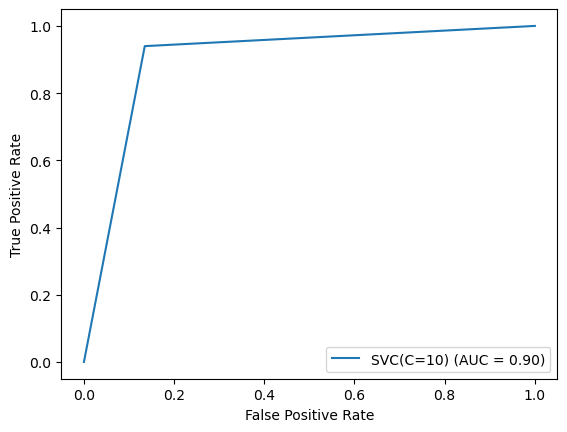

In [103]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [104]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"HR_Analytics_Understanding_the_Attrition_In_HR_Prediction_Project_Analysis.pkl")

['HR_Analytics_Understanding_the_Attrition_In_HR_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [105]:
# first we load the saved model and get prediction
model = joblib.load("HR_Analytics_Understanding_the_Attrition_In_HR_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

# These Are the Prediction for Attrition 

In [106]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
735,0,1
736,1,1
737,0,0
738,0,1


our findings

Support Vector Classifier is our best model as the difference between accuracy score and cross validation 
score is =-0.0009284794999080415 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

we also observe that after visualization of features and doing other EDA we finf in attrition of employee these 
features are directly related 
thease features are
BusinessTravel, Department,Gender, JobRole, MaritalStatus,Age,DailyRate,DistanceFromHome,MonthlyIncome,
MonthlyRate, NumCompaniesWorked, PercentSalaryHike,PerformanceRating, StandardHours, TotalWorkingYears. 
                  